\begin{center} 
Chun-Yuan (Scott) Chiu 
\end{center}
\begin{center} 
chunyuac@andrew.cmu.edu 
\end{center}

# 1. {-}

## (a) {-}

Let $k>0$, $t>s>0$. Since $X_t$ is weakly stationary, we have
\begin{align*}
\operatorname{Cov}(Y_{s+k}, Y_{t+k}) &= \operatorname{Cov}(X_{s+k}-X_{s+k-1}, X_{t+k}-X_{t+k-1}) \\
&= \operatorname{Cov}(X_{s+k}, X_{t+k}) - \operatorname{Cov}(X_{s+k-1}, X_{t+k}) - \operatorname{Cov}(X_{s+k}, X_{t+k-1}) + \operatorname{Cov}(X_{s+k-1}, X_{t+k-1})\\
&= \operatorname{Cov}(X_{s}, X_{t}) - \operatorname{Cov}(X_{s-1}, X_{t}) - \operatorname{Cov}(X_{s}, X_{t-1}) + \operatorname{Cov}(X_{s-1}, X_{t-1})\\
&= \operatorname{Cov}(X_{s}-X_{s-1}, X_{t}-X_{t-1}) \\
&= \operatorname{Cov}(Y_{s}, Y_{t}). 
\end{align*}
Thus $Y_t$ is weakly stationary too. 


Since $X_t$ is weakly stationary, it has constant mean. So the mean of $Y_t$ is 
\begin{align*}
E(Y_t) = E(X_t) - E(X_{t-1}) = 0. 
\end{align*}


The autocovariance function of $Y_t$ is 
\begin{align*}
\gamma_Y(h) &= \operatorname{Cov}(Y_{t+h}, Y_{t})\\
&= \operatorname{Cov}(X_{t+h}, X_{t}) - \operatorname{Cov}(X_{t+h-1}, X_{t}) - \operatorname{Cov}(X_{t+h}, X_{t-1}) + \operatorname{Cov}(X_{t+h-1}, X_{t-1})\\
&= 2(\gamma_X(h) - \gamma_X(h-1)), 
\end{align*}
where $\gamma_X(h)$ is the autocovariance function of $X_t$. In particular, the variance of $Y_t$ is 
\begin{align*}
\gamma_Y(0) = 2(\gamma_X(0) - \gamma_X(1)) = 2(\operatorname{Var}(X_t) - \operatorname{Cov}(X_{t}, X_{t-1})).
\end{align*}



## (b) {-}

Let $k>0$, $t>s>0$. Since $X_t^{(1)}$ and $X_t^{(2)}$ are both weakly stationary, we have
\begin{align*}
\operatorname{Cov}(Y_{s+k}, Y_{t+k}) &= \operatorname{Cov}(aX_{s+k}^{(1)} + bX_{s+k}^{(2)} + c, aX_{t+k}^{(1)} + bX_{t+k}^{(2)} + c) \\
&= a^2 \operatorname{Cov}(X_{s+k}^{(1)}, X_{t+k}^{(1)}) + b^2 \operatorname{Cov}(X_{s+k}^{(2)}, X_{t+k}^{(2)})\\
&= a^2 \operatorname{Cov}(X_{s}^{(1)}, X_{t}^{(1)}) + b^2 \operatorname{Cov}(X_{s}^{(2)}, X_{t}^{(2)})\\
&= \operatorname{Cov}(aX_{s}^{(1)} + bX_{s}^{(2)} + c, aX_{t}^{(1)} + bX_{t}^{(2)} + c) \\
&= \operatorname{Cov}(Y_{s}, Y_{t}). 
\end{align*}
Thus $Y_t$ is weakly stationary too. 

# 2. {-}

## (a) {-}

Following lecture #3, we have 
\begin{align*}
\rho_0 &= 1, \\
\rho_1 &= \phi_1 \rho_0 + \phi_2 \rho_{-1} = \phi_1 + \phi_2 \rho_1, \\
\rho_2 &= \phi_1\rho_1 + \phi_2\rho_0. 
\end{align*}
In matrix form, this is 
\begin{align*}
\begin{pmatrix}
\rho_1\\
\rho_2
\end{pmatrix} = 
\begin{pmatrix}
1 & \rho_1\\
\rho_1 & 1
\end{pmatrix}
\begin{pmatrix}
\phi_1\\
\phi_2
\end{pmatrix}, 
\end{align*}
which yields the solution
\begin{align*}
\begin{pmatrix}
\phi_1\\
\phi_2
\end{pmatrix} &= 
\begin{pmatrix}
1 & \rho_1\\
\rho_1 & 1
\end{pmatrix}^{-1}
\begin{pmatrix}
\rho_1\\
\rho_2
\end{pmatrix}\\
&= 
\frac{1}{1-\rho_1^2}
\begin{pmatrix}
1 & -\rho_1\\
-\rho_1 & 1
\end{pmatrix}
\begin{pmatrix}
\rho_1\\
\rho_2
\end{pmatrix}\\ 
&= 
\frac{1}{1-\rho_1^2}
\begin{pmatrix}
\rho_1 - \rho_1\rho_2\\
\rho_2 - \rho_1^2
\end{pmatrix}.
\end{align*}

## (b) {-}

As shown below, the estimated AR coefficients are close to the true value $\phi_1=0.33$, $\phi_2=-0.33$, and the estimated residual variance is close to the true value $\sigma_\epsilon^2 = 0.5$ too.

In [2]:
from statsmodels.regression.linear_model import yule_walker
import statsmodels.api as sm
import numpy as np

def yule_walker_on_ar2(n):
    arparams = np.array([.33, -.33])
    sigma = np.sqrt(0.5)
    
    ar = np.r_[1, -arparams]
    arma_process = sm.tsa.ArmaProcess(ar, ma=None)
    y = arma_process.generate_sample(n, sigma) 

    est_phi, est_sigma = yule_walker(y, order=2, method='mle')

    print(f'Estimated AR coefficients: {est_phi}')
    print(f'Estimated residual variance: {est_sigma**2}')
    
yule_walker_on_ar2(1000)

Estimated AR coefficients: [ 0.34797538 -0.31647417]
Estimated residual variance: 0.509394662375991


## (c) {-}

The same experiment is repeated for different sizes. As a results, for $n=500$ the estimates are still somewhat close to the true values, but not so much for $n=100$. 

In [32]:
yule_walker_on_ar2(100)

Estimated AR coefficients: [ 0.34496819 -0.24682399]
Estimated residual variance: 0.642033899889669


In [41]:
yule_walker_on_ar2(500)

Estimated AR coefficients: [ 0.35381183 -0.36110416]
Estimated residual variance: 0.47104129890080704


# 3. {-}

Following the lecture, for this MA(1) model we have the autocorrelation at lag 1
\begin{align*}
\rho_1 = \frac{\theta_1}{1 + \theta_1^2}, 
\end{align*}
or equivalently
\begin{align*}
\rho_1 = \frac{\theta_1}{1 + \theta_1^2}, 
\end{align*}

<AxesSubplot:>

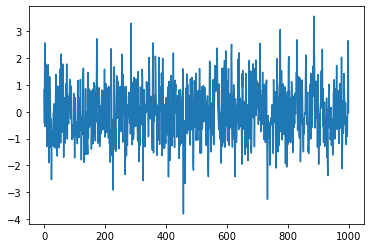

In [1]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
import numpy as np

n = 1000
maparams = np.array([.33])
sigma = np.sqrt(1)

ma = np.r_[1, maparams]
arma_process = sm.tsa.ArmaProcess(ar=None, ma=ma)

estimates = []
# for _ in range(1):

y = arma_process.generate_sample(n, sigma)

    
#     model = ARMA(y, (0, 1)).fit(trend='nc', disp=0)
#     estimates.append(model.params[0])
    
# print(f'Estimates: {estimates}\n')
# print(f'Mean of estimates: {np.array(estimates).mean()}')
# print(f'Std of estimates: {np.array(estimates).std()}')

# 3. {-}

We use $\theta_1 = 0.33$. The reported estimates are close to the true value with standard deviation 0.03.

In [62]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
import numpy as np

n = 1000
maparams = np.array([.33])
sigma = np.sqrt(1)

ma = np.r_[1, maparams]
arma_process = sm.tsa.ArmaProcess(ar=None, ma=ma)

estimates = []
for _ in range(10):
    y = arma_process.generate_sample(n, sigma) 
    model = ARMA(y, (0, 1)).fit(trend='nc', disp=0)
    estimates.append(model.params[0])
    
print(f'Estimates: {estimates}\n')
print(f'Mean of estimates: {np.array(estimates).mean()}')
print(f'Std of estimates: {np.array(estimates).std()}')

Estimates: [0.2994581080425217, 0.3366533160238069, 0.3860447532531026, 0.30040024327335935, 0.3649752518922333, 0.29827802996905356, 0.3191699668597348, 0.3187398469687148, 0.3599334441626878, 0.36708211601229734]

Mean of estimates: 0.3350735076457512
Std of estimates: 0.030792134782577658


# 4. {-}

We repeated the experiment 100 times and computed the confidence interval (CI). In `statsmodels.api.OLS` there is a convenient way to test if a specific coefficient is significantly non-zero: `model.t_test([0, 1]).conf_int()`, where `model` is the fitted model, and `[0, 1]` specifies we want the CI of the null hypothesis $\beta_1 = 0$. For example, using `[1, -2]`, we will be testing the null hypothesis $\beta_0-2\beta_1 = 0$. For more details see the [documentation](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.t_test.html). By default the `conf_int()` function reports the CI at a significance level of 5%. 


From our experiment, 73 out of 100 times 0 is not in the CI, which means the model suggests that $\beta_1$ is significantly non-zero. 

In [205]:
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm

rng = np.random.default_rng()
n = 50

res = []
for _ in range(100):
    X = rng.standard_normal(n).cumsum()
    Y = rng.standard_normal(n).cumsum()
    model = sm.OLS(Y, sm.add_constant(X)).fit()
    a, b = model.t_test([0, 1]).conf_int()[0]
    res.append(a < 0 < b)
    
print(f'{100-sum(res)} out of 100 times H_0 got rejected.')
print(f'CI from the last trial: ({a}, {b})')

73 out of 100 times H_0 got rejected.
CI from the last trial: (0.12175036620661622, 0.48039634360666733)
